In [1]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
warnings.filterwarnings(action='ignore')
mpl.rcParams['axes.unicode_minus'] = False

endpoint = 'dao.c51deksujiip.ap-northeast-2.rds.amazonaws.com'
schema = 'dao'
db_connection_str = 'mysql+pymysql://admin:ekfkawnl@{}/{}'.format(endpoint, schema)
try :
    db_connection = create_engine(db_connection_str)
    conn = db_connection.connect()
except :
    print('fail to connect db')

def load_data_from_rds(tabel_name):
  sql = "SELECT * FROM {}".format(tabel_name)
  df = pd.read_sql(sql, db_connection)
  return df

In [2]:
import sys, os
# sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(__file__))))

from preprocessing.preprocessing_func import preprocess_df

# 육교형

In [3]:
main_df = load_data_from_rds('MainData_mean_overpass')

In [4]:
main_df.columns

Index(['번호', '위도', '경도', '생태통로_유형', '차선_수', '등산객_이용빈도', '생태통로_효율성', '이용확인종_수',
       '폭(m)', '연장(m)', '경사도', '주변 로드킬 빈도', '산책로까지의 최단 거리(km)', '농가까지의 거리(km)',
       '도로 최고제한속도(km/h)', '주변 동물종 개수', '주변동물 출현빈도', '지형기호(2.3km)', '하천거리(km)',
       '식물군락명', '등산로까지 최단거리(km)', '유도울타리_위도_2.3km', '유도울타리_경도_2.3km',
       '유도울타리_연장_m', '유도울타리_높이_m', '교통량', '환경영향평가점수', '건물까지거리(km)', '최우점식물군락'],
      dtype='object')

In [5]:
main_df['경사도'] = main_df['경사도'].astype('int64')

In [6]:
onehot_col = ['지형기호(2.3km)', '최우점식물군락']
scaling_col = ['폭(m)', '연장(m)', '주변 로드킬 빈도', '산책로까지의 최단 거리(km)', '농가까지의 거리(km)', '도로 최고제한속도(km/h)',
               '하천거리(km)', '주변 동물종 개수', '등산로까지 최단거리(km)', '유도울타리_연장_m', '유도울타리_높이_m', '교통량', '건물까지거리(km)']
drop_col = ['번호', '위도', '경도', '생태통로_유형', '이용확인종_수', '유도울타리_위도_2.3km', '유도울타리_경도_2.3km', '식물군락명']
df = preprocess_df(main_df, drop_col=drop_col, labeling_col=onehot_col, scaling_func=MinMaxScaler)
df

,차선_수,등산객_이용빈도,생태통로_효율성,폭(m),연장(m),경사도,주변 로드킬 빈도,산책로까지의 최단 거리(km),농가까지의 거리(km),도로 최고제한속도(km/h),...,주변동물 출현빈도,지형기호(2.3km),하천거리(km),등산로까지 최단거리(km),유도울타리_연장_m,유도울타리_높이_m,교통량,환경영향평가점수,건물까지거리(km),최우점식물군락
0,1,1,3,33.10,43.9,6,0,32.993820,0.223706,80,...,2,0,134.468063,3.157026,0,0.000000,7493.875000,2,0.196597,10
1,2,5,1,8.23,38.0,4,5,140.219401,0.183505,80,...,0,0,2275.200182,0.025083,886,1.571429,34542.400000,5,0.172184,13
2,0,1,2,25.10,13.0,6,0,220.756605,0.128056,60,...,4,0,350.090413,0.003337,0,0.000000,53562.850000,1,0.387330,12
3,1,0,3,33.10,43.9,2,0,288.314212,0.010158,80,...,6,5,550.578792,4.207701,0,0.000000,11264.142857,3,0.052282,6
4,0,0,1,37.30,12.4,6,0,164.848600,0.248581,60,...,21,6,528.495270,3.376660,0,0.000000,3108.800000,1,0.600382,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2,0,0,13.30,50.7,2,5,140.166888,0.287976,80,...,0,0,2274.279975,0.025617,442,1.000000,34270.190476,5,0.179017,13
296,1,5,0,13.60,38.7,5,5,140.681388,0.119958,80,...,0,0,1722.566263,0.021407,886,1.571429,34542.400000,5,0.094304,13
297,1,5,0,13.30,50.7,4,5,140.066912,0.116240,80,...,0,0,2532.215687,0.008204,886,1.571429,34270.190476,5,0.124789,13
298,0,0,0,7.00,20.0,5,0,145.890079,0.023978,60,...,0,0,2096.234333,0.878327,884,1.500000,26748.437500,2,0.070303,9


In [7]:
df.columns

Index(['차선_수', '등산객_이용빈도', '생태통로_효율성', '폭(m)', '연장(m)', '경사도', '주변 로드킬 빈도',
       '산책로까지의 최단 거리(km)', '농가까지의 거리(km)', '도로 최고제한속도(km/h)', '주변 동물종 개수',
       '주변동물 출현빈도', '지형기호(2.3km)', '하천거리(km)', '등산로까지 최단거리(km)', '유도울타리_연장_m',
       '유도울타리_높이_m', '교통량', '환경영향평가점수', '건물까지거리(km)', '최우점식물군락'],
      dtype='object')

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('생태통로_효율성', axis=1), df['생태통로_효율성'], test_size=0.2, stratify=df['생태통로_효율성'])
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(240, 20) (60, 20) (240,) (60,)


In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(train_x, train_y)
pred = rf_clf.predict(test_x)
print(accuracy_score(pred, test_y))

0.48333333333333334


Feature Ranking:
1. feature 산책로까지의 최단 거리(km) (0.093336)
2. feature 연장(m) (0.085780)
3. feature 건물까지거리(km) (0.082496)
4. feature 폭(m) (0.074623)
5. feature 농가까지의 거리(km) (0.071987)
6. feature 교통량 (0.071804)
7. feature 등산로까지 최단거리(km) (0.070348)
8. feature 하천거리(km) (0.070019)
9. feature 등산객_이용빈도 (0.048339)
10. feature 최우점식물군락 (0.047364)
11. feature 주변동물 출현빈도 (0.046903)


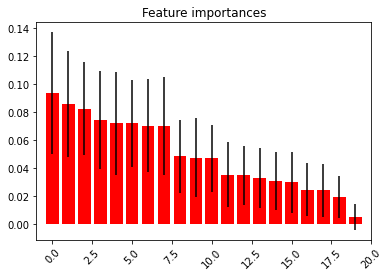

In [ ]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature Ranking:')

for f in range(train_x.shape[1]) :
    print('{}. feature {} ({:3f})'.format(f+1, train_x.columns[indices][f], importances[indices[f]]))
    if f == 10 :
      break

plt.title('Feature importances')
plt.bar(range(train_x.shape[1]), importances[indices],
        color='r', yerr=std[indices])
plt.xlim([-1, train_x.shape[1]])
plt.xticks(rotation=45)
plt.show()

# 터널형

In [8]:
main_df = load_data_from_rds('MainData_mean_tunnel')

In [9]:
main_df.columns

Index(['번호', '위도', '경도', '생태통로_유형', '차선_수', '등산객_이용빈도', '생태통로_효율성', '이용확인종_수',
       '폭(m)', '연장(m)', '높이(m)', '개방도', '경사도', '주변 로드킬 빈도', '산책로까지의 최단 거리(km)',
       '농가까지의 거리(km)', '도로 최고제한속도(km/h)', '주변 동물종 개수', '주변동물 출현빈도',
       '지형기호(2.3km)', '하천거리(km)', '식물군락명', '등산로까지 최단거리(km)', '유도울타리_위도_2.3km',
       '유도울타리_경도_2.3km', '유도울타리_연장_m', '유도울타리_높이_m', '교통량', '환경영향평가점수',
       '건물까지거리(km)', '최우점식물군락'],
      dtype='object')

In [10]:
onehot_col = []
scaling_col = ['폭(m)', '연장(m)', '높이(m)', '개방도', '산책로까지의 최단 거리(km)', '농가까지의 거리(km)', 
               '도로 최고제한속도(km/h)', '하천거리(km)', '등산로까지 최단거리(km)', '유도울타리_연장_m', '유도울타리_높이_m', '교통량', '건물까지거리(km)']
drop_col = ['번호', '위도', '경도', '생태통로_유형', '이용확인종_수', '유도울타리_위도_2.3km', '유도울타리_경도_2.3km', '식물군락명', '지형기호(2.3km)', '최우점식물군락']
df = preprocess_df(main_df, scaling_col=scaling_col, drop_col=drop_col, scaling_func=MinMaxScaler)
df

,차선_수,등산객_이용빈도,생태통로_효율성,폭(m),연장(m),높이(m),개방도,경사도,주변 로드킬 빈도,산책로까지의 최단 거리(km),...,도로 최고제한속도(km/h),주변 동물종 개수,주변동물 출현빈도,하천거리(km),등산로까지 최단거리(km),유도울타리_연장_m,유도울타리_높이_m,교통량,환경영향평가점수,건물까지거리(km)
0,0,0,3,0.368421,0.359091,0.421053,0.295302,5,0,0.592972,...,0.0,3,5,0.079895,0.083177,0.000000,0.000000,0.031498,1,0.159386
1,0,0,1,0.368421,0.359091,0.421053,0.295302,2,0,0.538555,...,0.0,0,0,0.013727,0.235381,0.000000,0.000000,0.029923,2,0.061278
2,0,0,1,0.368421,0.359091,0.421053,0.295302,2,0,0.538105,...,0.0,0,0,0.022988,0.223907,0.000000,0.000000,0.029923,2,0.018963
3,0,1,3,0.368421,0.359091,0.421053,0.295302,6,0,0.723885,...,0.0,5,7,0.231128,0.283250,0.000000,0.000000,0.033870,1,0.076094
4,0,1,0,0.368421,0.359091,0.421053,0.295302,4,0,0.897709,...,0.0,0,0,0.017241,0.004202,0.000000,0.000000,0.161424,5,0.019807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,1,2,1,0.368421,0.359091,0.421053,0.295302,2,0,0.579863,...,0.4,2,10,0.188566,0.561823,0.000000,0.000000,0.114550,5,0.220247
193,1,0,1,0.368421,0.359091,0.421053,0.295302,2,0,0.580725,...,0.4,2,10,0.143116,0.578913,0.000000,0.000000,0.114550,1,0.112635
194,2,2,0,0.368421,0.359091,0.421053,0.295302,3,3,0.473805,...,0.4,0,0,0.186413,0.088804,0.455123,0.833333,0.594723,5,0.022249
195,1,2,0,0.368421,0.359091,0.421053,0.295302,1,0,0.473151,...,0.4,0,0,0.001462,0.131636,0.000000,0.000000,0.594723,5,0.020380


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(df.drop('생태통로_효율성', axis=1), df['생태통로_효율성'], test_size=0.2, stratify=df['생태통로_효율성'])
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(157, 20) (40, 20) (157,) (40,)


In [ ]:
rf_clf_2 = RandomForestClassifier()
rf_clf_2.fit(train_x, train_y)
pred = rf_clf_2.predict(test_x)
print(accuracy_score(pred, test_y))

0.5


Feature Ranking:
1. feature 교통량 (0.120840)
2. feature 산책로까지의 최단 거리(km) (0.106859)
3. feature 등산로까지 최단거리(km) (0.099914)
4. feature 농가까지의 거리(km) (0.091653)
5. feature 건물까지거리(km) (0.090141)
6. feature 하천거리(km) (0.083047)
7. feature 등산객_이용빈도 (0.068155)
8. feature 주변동물 출현빈도 (0.044273)
9. feature 경사도 (0.043294)
10. feature 주변 동물종 개수 (0.042755)
11. feature 도로 최고제한속도(km/h) (0.037043)


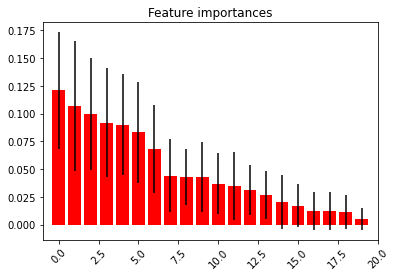

In [ ]:
importances = rf_clf_2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf_2.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print('Feature Ranking:')

for f in range(train_x.shape[1]) :
    print('{}. feature {} ({:3f})'.format(f+1, train_x.columns[indices][f], importances[indices[f]]))
    if f == 10 :
      break

plt.title('Feature importances')
plt.bar(range(train_x.shape[1]), importances[indices],
        color='r', yerr=std[indices])
plt.xlim([-1, train_x.shape[1]])
plt.xticks(rotation=45)
plt.show()

# Parameter 조정 (GridSearch CV)

In [ ]:
%%time
parameters = {
    'n_estimators': range(10, 100, 10),
    'max_depth' : range(1, 30, 2),
    'min_samples_split': range(1, 10, 7),
    'min_samples_leaf': [1, 3, 5]
}

# Random Forest
grid_cv = GridSearchCV(rf_clf, param_grid=parameters, n_jobs=-1, scoring='accuracy', cv=5)
grid_cv.fit(train_x, train_y)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_cv.best_score_))
best_cv = grid_cv.best_estimator_

# GridSearchCV의 최적 하이퍼파라미터로 학습된 Estimator로 예측 및 평가 수행
pred = best_cv.predict(test_x)
accuracy = accuracy_score(test_y , pred)
print('RandomForesetClassifier 정확도 : {0:.4f}'.format(accuracy))